HELLO,

IN THIS PROJECT I'LL PROPOSE AN ANALYSIS ON AN HIPOTETICAL SUPPLY-CHAIN DATABASE IN ORDER TO IDENTIFY OPPORTUNITIES FOR THE COMPANY AND THE SUPPLY BASE. 

MY MAIN GOALS HERE GENERATE SEMI-RANDOM DATABASES FOR SUPPLIERS, SALES AND PRODUCTS, JOIN THEM AS NECESSARY AND EXPLORE, CLEANSE AND ANALYSE THIS DATA, BRINGING AS MANY INSIGHTS AS POSSIBLE IN ORDER TO BETTER UNDERSTAND THIS COMPANY'S SUPPLYING BEHAVIOR PATTERN AND DISPLAY THESE INSIGHTS WITH EASY-TO-UNDERSTAND VISUALIZATION, ALSO COMMENTING WITH MY OWN CONCLUSIONS ABOUT THE GENERATED DATA.

HOPE YOU'LL ENJOY IT.

IMPORTING THE NECESSARY PYTHON LIBRARIES:

In [15]:
##Import Libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
from pandasql import sqldf
import glob
import os.path
from datetime import date
import win32com.client as win32

from datetime import date, timedelta
from random import choices
import plotly.express as px

SETTING THINGS UP IN ORDER TO GENERATE THE DATABASES!

In [16]:
##List of Countries-Continents

##HERE I'LL DEFINE SOME BASE LISTS SO I CAN USE THEM TO GENERATE SEMI-RANDOM DATAFRAMES

continents = {'1':'Africa',
'2':'Africa',
'3':'Africa',
'4':'Africa',
'5':'Africa',
'6':'South America',
'7':'South America',
'8':'South America',
'9':'South America',
'10':'South America',
'11':'North America',
'12':'North America',
'13':'North America',
'16':'Europe',
'17':'Europe',
'18':'Europe',
'19':'Europe',
'20':'Europe',
'21':'Asia',
'22':'Asia',
'23':'Asia',
'24':'Asia',
'25':'Asia'

                }

countries = {'1':'Ghana',
'2':'Cameroon',
'3':'South Africa',
'4':'Nigeria',
'5':'Morocco',
'6':'Brazil',
'7':'Argentina',
'8':'Chile',
'9':'Uruguay',
'10':'Paraguay',
'11':'USA',
'12':'Canada',
'13':'Mexico',
'16':'Italy',
'17':'Spain',
'18':'Portugal',
'19':'France',
'20':'Russia',
'21':'China',
'22':'Japan',
'23':'South Korea',
'24':'North Korea',
'25':'India'






}
companies_contracts = {
            'Company 1':'Contract 1',
            'Company 2':'Contract 2',
            'Company 3':'Contract 3',
            'Company 4':'Contract 4',
            'Company 5':'Contract 5',
            'Company 6':'Contract 6',
            'Company 7':'Contract 7',
            'Company 8':'Contract 8',
            'Company 9':'Contract 9',
            'Company 10':'Contract 10',
            'Company 11':'Contract 11',
            'Company 12':'Contract 12',
            'Company 13':'Contract 13',
            'Company 14':'Contract 14',
            'Company 15':'Contract 15',
            'Company 16':'Contract 16',
            'Company 17':'Contract 17',
            'Company 18':'Contract 18',
            'Company 19':'Contract 19',
            'Company 20':'Contract 20'


}

units= {'Unit 1', 'Unit 2', 'Unit 3', 'Unit 4','Unit 5'}


product_per_contract = {

            'Contract 1':'Product 1',
            'Contract 2':'Product 2',
            'Contract 3':'Product 3',
            'Contract 4':'Product 4',
            'Contract 5':'Product 5',
            'Contract 6':'Product 6',
            'Contract 7':'Product 7',
            'Contract 8':'Product 8',
            'Contract 9':'Product 9',
            'Contract 10':'Product 10',
            'Contract 11':'Product 11',
            'Contract 12':'Product 12',
            'Contract 13':'Product 13',
            'Contract 14':'Product 14',
            'Contract 15':'Product 15',
            'Contract 16':'Product 16',
            'Contract 17':'Product 17',
            'Contract 18':'Product 18',
            'Contract 19':'Product 19',
            'Contract 20':'Product 20'



}

In [17]:
##Creates Supplier df

##NOW I'LL USE THOSE LISTS TO CREATE THE SUPPLIERS DATAFRAME
##THIS WILL SERVE AS THE COMPANIES SUPPLIER BASE, WITH EACH SUPPLIERS BASIC INFO

supplier_df =  pd.DataFrame(np.random.randint(35,100,size=(100, 1)), columns=['Goods Receipt Time'])

##Gets location info
supplier_df['Cont_Index'] = np.random.choice(list(continents), len(supplier_df))
supplier_df['Continent'] = supplier_df['Cont_Index'].map(continents)
supplier_df['Country'] = supplier_df['Cont_Index'].map(countries)

##Gets company and contract info
supplier_df['Company']   = np.random.choice(list(companies_contracts), len(supplier_df))
supplier_df['Contract'] = supplier_df['Company'].map(companies_contracts)

display(supplier_df)

,Goods Receipt Time,Cont_Index,Continent,Country,Company,Contract
0,71,4,Africa,Nigeria,Company 6,Contract 6
1,40,11,North America,USA,Company 17,Contract 17
2,82,10,South America,Paraguay,Company 15,Contract 15
3,86,9,South America,Uruguay,Company 18,Contract 18
4,63,10,South America,Paraguay,Company 12,Contract 12
...,...,...,...,...,...,...
95,89,6,South America,Brazil,Company 11,Contract 11
96,79,9,South America,Uruguay,Company 20,Contract 20
97,42,11,North America,USA,Company 15,Contract 15
98,71,23,Asia,South Korea,Company 16,Contract 16


In [18]:
##Generate random dates
 
# initializing dates ranges
test_date1, test_date2 = date(2023, 1, 1), date(2023, 7, 1)
 
 
# initializing K
K = 20
 
res_dates = [test_date1]
 
# loop to get each date till end date
while test_date1 != test_date2:
    test_date1 += timedelta(days=1)
    res_dates.append(test_date1)
 
# random K dates from pack
res = choices(res_dates, k=K)
 

In [19]:
##Create Sales DF

sales_df =  pd.DataFrame(np.random.randint(0,1000,size=(5000, 1)), columns=['Sales Qty'])
sales_df['Contract'] = np.random.choice(supplier_df['Contract'], len(sales_df))
sales_df['Product'] = sales_df['Contract'].map(product_per_contract)

##Generates semi-random shipdate
sales_df['Ship Date'] = np.random.choice(list(res), len(sales_df))


##GENERATES CONTRACT UNIT
sales_df['Internal Unit'] = np.random.randint(1, 5, sales_df.shape[0])
sales_df['Internal Unit'] = 'Unit ' + sales_df['Internal Unit'].astype(str)


display(sales_df)

,Sales Qty,Contract,Product,Ship Date,Internal Unit
0,951,Contract 16,Product 16,2023-04-03,Unit 3
1,768,Contract 12,Product 12,2023-02-20,Unit 2
2,771,Contract 16,Product 16,2023-05-14,Unit 2
3,291,Contract 10,Product 10,2023-01-11,Unit 1
4,722,Contract 16,Product 16,2023-04-05,Unit 4
...,...,...,...,...,...
4995,798,Contract 5,Product 5,2023-03-20,Unit 2
4996,7,Contract 13,Product 13,2023-03-20,Unit 2
4997,408,Contract 9,Product 9,2023-03-12,Unit 1
4998,622,Contract 4,Product 4,2023-04-03,Unit 2


In [20]:
##Create Product Database

#Turns products list into DF so I can append the product information into it
productb_df = pd.DataFrame([product_per_contract])
productb_df = pd.DataFrame(productb_df.values)
productb_df = productb_df.T
productb_df.rename(columns={ productb_df.columns[0]: "Products" }, inplace = True)

## Defines Random Internal buyer
productb_df['Internal Buyer'] = np.random.randint(1, 11, productb_df.shape[0])
productb_df['Internal Buyer'] = 'Person ' + productb_df['Internal Buyer'].astype(str)

##Appends Market Value to the products
productb_df['Market Value'] = np.random.uniform(low=25, high=2000, size=(productb_df.shape[0],))


##Appends Planning Type To the Itens

productb_df['Planning Type'] =np.random.choice(['Type 1','Type 2','Type 3'],len(productb_df))

##Adds Safety Stock

productb_df['Safety Stock'] = np.random.randint(0,20,size=(len(productb_df), 1))


##Adds item category

productb_df['Item Category'] = np.random.randint(1,3,size=(len(productb_df), 1))

##Appends Item Weight [KG]
productb_df['Weight'] = np.random.uniform(low=1.5, high=20, size=(productb_df.shape[0],))

##Appends Item Volume [m³]
productb_df['Volume'] = np.random.uniform(low=0.01, high=1, size=(productb_df.shape[0],))

display(productb_df)



,Products,Internal Buyer,Market Value,Planning Type,Safety Stock,Item Category,Weight,Volume
0,Product 1,Person 10,468.525369,Type 2,18,1,3.326435,0.281196
1,Product 2,Person 1,406.016718,Type 2,15,1,1.896459,0.064240
2,Product 3,Person 3,1385.593578,Type 2,11,1,3.142301,0.944588
3,Product 4,Person 3,1151.981356,Type 2,2,1,19.038246,0.127221
4,Product 5,Person 8,1771.338966,Type 1,7,2,12.973698,0.807112
5,Product 6,Person 10,1125.903970,Type 1,14,2,9.189370,0.720350
6,Product 7,Person 10,1041.041958,Type 1,2,2,17.807103,0.638548
7,Product 8,Person 1,529.083425,Type 2,1,1,10.803990,0.374926
8,Product 9,Person 5,379.479938,Type 1,4,1,15.617518,0.153131
9,Product 10,Person 10,985.776519,Type 1,10,1,18.943830,0.615542


WITH THE DATABASES GENERATED, I CAN BEGIN MY ANALYSIS

NOW, THE FIRST INSIGHT I'D LIKE TO GET IS THE SUPPLIER PROFILE IN TERMS OF VOLUME OF SALES. I'LL MAKE THIS ANALYSIS BELOW.

Below we can see the top five suppliers in cumulative sales value:


,Company,Cumulative Sales ($),Order Qty
0,Company 15,24469.400690,156
1,Company 8,51321.092268,97
2,Company 1,71684.381449,153
3,Company 11,74806.156125,421
4,Company 18,89835.421699,139


In this case, we can see that the Supplier with most sales is: Company 18


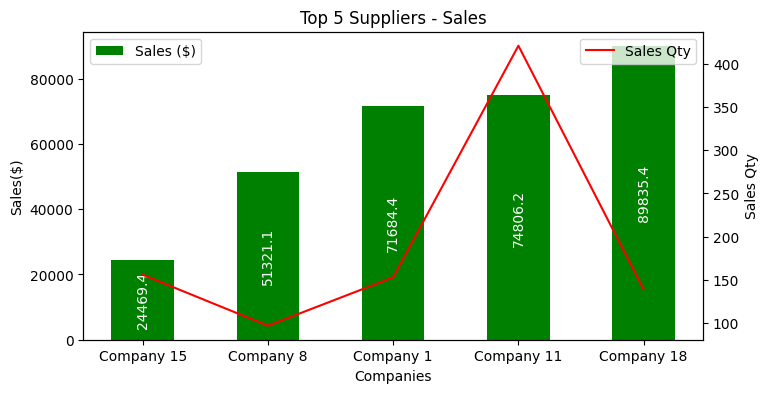

In [21]:
##SUPPLIERS VOLUME
##HERE I'LL ESTIMATE THE TOP 5 SUPLLIERS IN TERMS OF CUMULATIVE BOUGHT ITENS VALUE.


print('Below we can see the top five suppliers in cumulative sales value:')

##SQL QUERY TO RETRIEVE AND TRANSFORM THE DATA
top_5_supppliers_in_value = sqldf('''

--SINCE THE SAME COMPANY CAN HAVE SUBSIDIARIES IN MORE THAN ONE COUNTRY, I'LL HAVE TO GROUP THE SUPPLIERS DB BY COMPANY AND CONTRACT NUMBER
WITH GROUP_SUP AS (

SELECT sup_db.Company, sup_db.Contract

FROM supplier_df sup_db
                                

GROUP BY sup_db.Company, sup_db.Contract

)


SELECT 
                                    sup_db_grouped.Company, 
                                    SUM(prod_db.'Market Value') AS 'Cumulative Sales ($)',
                                    Count(sup_db_grouped.Company) AS 'Order Qty'


                                    FROM sales_df sales_db



LEFT JOIN productb_df prod_db ON(
--HERE I'LL HAVE JUST A KEY FIELD, BUT IT COULD BE MORE IN OTHER CASES                             
                                    prod_db.Products = sales_db.Product)



LEFT JOIN GROUP_SUP sup_db_grouped ON(
--HERE I'LL HAVE JUST A KEY FIELD, BUT IT COULD BE MORE IN OTHER CASES                                       
                                    sup_db_grouped.Contract = sales_db.Contract)


GROUP BY sup_db_grouped.Company

ORDER BY SUM(prod_db.'Market Value') ASC
                                    
LIMIT 5

''')

display(top_5_supppliers_in_value)



print('In this case, we can see that the Supplier with most sales is:', top_5_supppliers_in_value['Company'][4])

##Now We'll make some graphics in order to get a better visualization of the data

x = np.arange(len(top_5_supppliers_in_value))
width = 0.5


fig, ax = plt.subplots(figsize=(8,4))

# plot data in grouped manner of bar type - SALES $
ax.bar(x, top_5_supppliers_in_value['Cumulative Sales ($)'], width, color = 'Green')
plt.xticks(x, top_5_supppliers_in_value['Company'], rotation ='vertical')
ax.bar_label(ax.containers[0], label_type='center', rotation = 'vertical', color ='w')
plt.xlabel("Companies")
plt.ylabel("Sales($)")
plt.title('Top 5 Suppliers - Sales')
ax.legend(["Cumulative Sales ($)"])

## PLOT SALES QTY
ax2 = top_5_supppliers_in_value['Order Qty'].plot(secondary_y=True, color ='red')
ax2.set_ylabel('Sales Qty')
ax.legend(["Sales ($)"],loc = 'upper left')
ax2.legend(["Sales Qty"],loc = 'upper right')

NOW I'D LIKE TO SEE HOW THE MAIN SUPPLIERS REFLECT ON THE COMPANY'S TOTAL SALES VALUE.

Below we can see the percentage of sales for each supplier:


,Pie Chart Slices,Supplier Percentage
0,Other Suppliers,0.217740
1,Company 12,0.125646
2,Company 17,0.104074
3,Company 14,0.100629
4,Company 20,0.081999
5,Company 19,0.076530
6,Company 3,0.065074
7,Company 5,0.063574
8,Company 6,0.062576
9,Company 16,0.059094


In this case, we can see that the Supplier with most share in sales is Company 12 with 12.6 % of the shares.


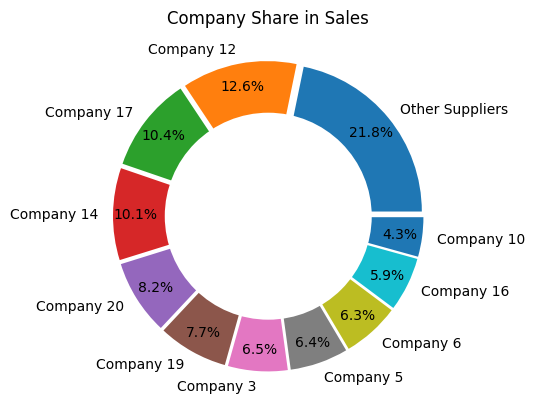

Since the sample of sales is a random sorting, it is expected that the shares will not vary much in size. But in real cases well be able to see more clearly the distinction.


In [22]:
##SUPLLIERS BASE PERCENTAGE
##HERE WE'LL LOOK AT THE DATA IN ORDER TO SEE THE PERCENTAGE OF EACH SUPPLIER IN CUMULATIVE SALES VALUE

print('Below we can see the percentage of sales for each supplier:')

##SQL QUERY TO RETRIEVE AND TRANSFORM THE DATA
suppliers_percentage = sqldf('''



                                  
--SINCE THE SAME COMPANY CAN HAVE SUBSIDIARIES IN MORE THAN ONE COUNTRY, I'LL HAVE TO GROUP THE SUPPLIERS DB BY COMPANY AND CONTRACT NUMBER
WITH GROUP_SUP AS (
                                  
SELECT sup_db.Company, sup_db.Contract

FROM supplier_df sup_db
                                
                                  
GROUP BY sup_db.Company, sup_db.Contract

)
            
, SUP_PERCENTAGE AS (

SELECT 
                                  sup_db_grouped.Company, 
                                  SUM(prod_db.'Market Value')/(
                                  

                                        --NESTED JOIN SO I CAN GET THE CUMULATIVE SALES AMOUNT
                                            SELECT 
                                            SUM(prod_db.'Market Value') 


                                            FROM sales_df sales_db


                                    
                                            LEFT JOIN productb_df prod_db ON(
                                            --HERE I'LL HAVE JUST A KEY FIELD, BUT IT COULD BE MORE IN OTHER CASES                             
                                                                            prod_db.Products = sales_db.Product)
                                                                            


                                            LEFT JOIN GROUP_SUP sup_db_grouped ON(
                                            --HERE I'LL HAVE JUST A KEY FIELD, BUT IT COULD BE MORE IN OTHER CASES  
                                            sup_db_grouped.Contract = sales_db.Contract)







                                  
                                  ) AS 'Supplier Percentage',
                                        --RANKING VALUES SO I CAN AGGREGATE LESSER ONES INTO 'OTHER' PIE SLICE
                                  RANK () OVER ( ORDER BY SUM(prod_db.'Market Value') DESC ) as Company_Rank,

                                  CASE WHEN RANK () OVER ( ORDER BY SUM(prod_db.'Market Value') DESC )<11 THEN  sup_db_grouped.Company ELSE 'Other Suppliers' END AS 'Pie Chart Slices'

                                  
                                  FROM sales_df sales_db


                                  
LEFT JOIN productb_df prod_db ON(
--HERE I'LL HAVE JUST A KEY FIELD, BUT IT COULD BE MORE IN OTHER CASES                             
                                  prod_db.Products = sales_db.Product)
                                  


LEFT JOIN GROUP_SUP sup_db_grouped ON(
--HERE I'LL HAVE JUST A KEY FIELD, BUT IT COULD BE MORE IN OTHER CASES                                       
                                 sup_db_grouped.Contract = sales_db.Contract)


GROUP BY sup_db_grouped.Company
                                  
ORDER BY SUM(prod_db.'Market Value') ASC
                                  

)                                  


 
SELECT SUP_PERCENTAGE.'Pie Chart Slices', SUM(SUP_PERCENTAGE.'Supplier Percentage') AS 'Supplier Percentage'

FROM SUP_PERCENTAGE

GROUP BY SUP_PERCENTAGE.'Pie Chart Slices'

ORDER BY SUM(SUP_PERCENTAGE.'Supplier Percentage') DESC



''')

display(suppliers_percentage)


print('In this case, we can see that the Supplier with most share in sales is', suppliers_percentage['Pie Chart Slices'][1],'with',round(suppliers_percentage['Supplier Percentage'][1]*100,1),'% of the shares.')


##Now We'll make some graphics in order to get a better visualization of the data

##creates explode array 

my_explode = [0.05]*len(suppliers_percentage['Supplier Percentage'])


##creates pie chart
plt.pie(suppliers_percentage['Supplier Percentage'],  labels=suppliers_percentage['Pie Chart Slices'],autopct='%1.1f%%', pctdistance=0.85,  explode=my_explode)
 
# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
 
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
 
# Adding Title of chart
plt.title('Company Share in Sales')
 
# Displaying Chart
plt.show()

print('Since the sample of sales is a random sorting, it is expected that the shares will not vary much in size. But in real cases we''ll be able to see more clearly the distinction.')


ANOTHER NICE VIZ IS THE SALES PRICE X VOLUME, IN ORDER TO IDENTIFY BUYING TENDENCIES RELATED TO THE PRODUCTS PRICES

Now we can see the summarized itens list and main measures, such as price, weight, and sales qty.


,Product,Weight,Volume,Sales Qty,Density,Market Value,Total Purchase Spend
0,Product 16,13.741664,0.591118,951,23.246922,684.426256,6.508894e+05
1,Product 12,11.503311,0.813544,768,14.139753,1122.066907,8.617474e+05
2,Product 16,13.741664,0.591118,771,23.246922,684.426256,5.276926e+05
3,Product 10,18.943830,0.615542,291,30.775864,985.776519,2.868610e+05
4,Product 16,13.741664,0.591118,722,23.246922,684.426256,4.941558e+05
...,...,...,...,...,...,...,...
4995,Product 5,12.973698,0.807112,798,16.074231,1771.338966,1.413528e+06
4996,Product 13,1.644976,0.310803,7,5.292656,870.411244,6.092879e+03
4997,Product 9,15.617518,0.153131,408,101.988073,379.479938,1.548278e+05
4998,Product 4,19.038246,0.127221,622,149.646957,1151.981356,7.165324e+05


Below we can see a map that summarizes in which volume span the company spends most money. This can help us understand the companys 
shipping cost related to rent containers in ports or airpots.

In many cases, this price is set by volume transported, so this study is justified.


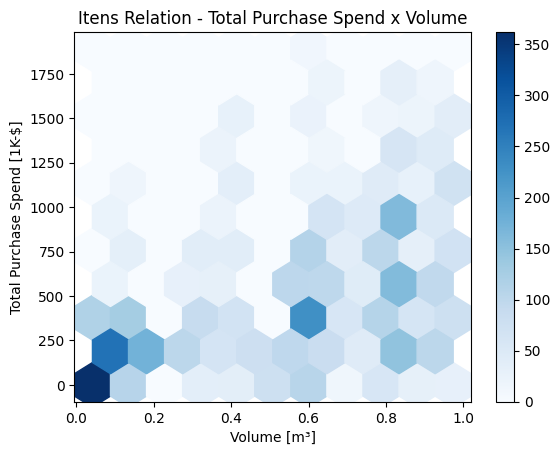

For the graphic above, we can understand that if the darker colors tend to the right side of the viz, we have more occurences of high volume 
shipment orders, which demands a closer look on logistics of these parts, since the shipping cost will be greater due to the increased volume.

On the other hand, if the darker colors tend to the left, the shipment profile tends to be a cheaper one in comparison.


In [23]:
##SALES PRICE X VOLUME

##THIS STUDY MAY BE INTERESTING FROM THE SUPPLY CHAIN PERSPECTIVE SO WE CAN ANALYSE THE SHIPPING PER VOLUME RELATION FOR THE COMPANY'S ITENS.

Itens_price_and_other_measures = sqldf('''


Select  sales_db.Product, prod_db.Weight, prod_db.Volume, sales_db.'Sales Qty', prod_db.Weight/prod_db.Volume as Density, prod_db.'Market Value', prod_db.'Market Value' * sales_db.'Sales Qty' as 'Total Purchase Spend'

                            from sales_df sales_db


left join productb_df prod_db on (
                            sales_db.Product = prod_db.Products
)   




''')

print('Now we can see the summarized itens list and main measures, such as price, weight, and sales qty.')

display(Itens_price_and_other_measures)



print('Below we can see a map that summarizes in which volume span the company spends most money. This can help us understand the company''s \nshipping cost related to rent containers in ports or airpots.')
print('\nIn many cases, this price is set by volume transported, so this study is justified.')

# plot:

# Control the color
plt.hexbin( Itens_price_and_other_measures['Volume'],Itens_price_and_other_measures['Total Purchase Spend']/1000, gridsize=10, cmap=plt.cm.Blues)



plt.colorbar()

plt.title('Itens Relation - Total Purchase Spend x Volume')
plt.xlabel("Volume [m³]")
plt.ylabel("Total Purchase Spend [1K-$]")



plt.show()

print('For the graphic above, we can understand that if the darker colors tend to the right side of the viz, we have more occurences of high volume \nshipment orders, which demands a closer look on logistics of these parts, since the shipping cost will be greater due to the increased volume.')
print('\nOn the other hand, if the darker colors tend to the left, the shipment profile tends to be a cheaper one in comparison.')

 

NOW WE'LL ANALYZE THE SALES PROFILE PER CONTINENT AND COUNTRY

Here we can see the continent with the most sales:


,Continent,Sales Qty
0,North America,1518958
1,Asia,1627778
2,Africa,2826146
3,South America,3886753
4,Europe,5199199


Now lets calculate the sales per country inside this continent.
Sales in North America :


,Country,Sales Qty
0,Mexico,253310
1,USA,600378
2,Canada,665270



Below we can see the results shown above in a horizontal bar format



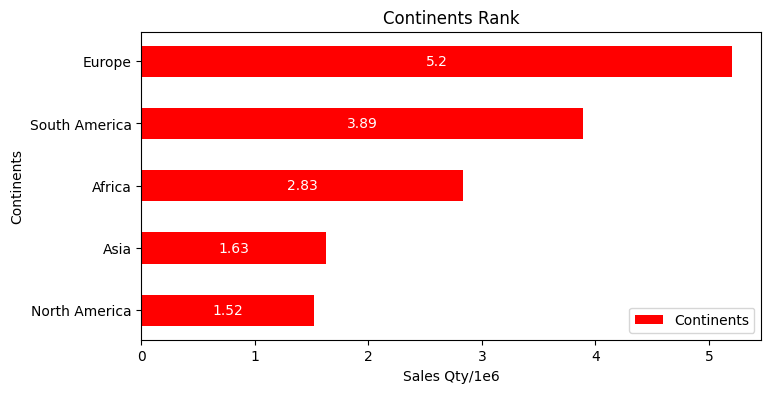

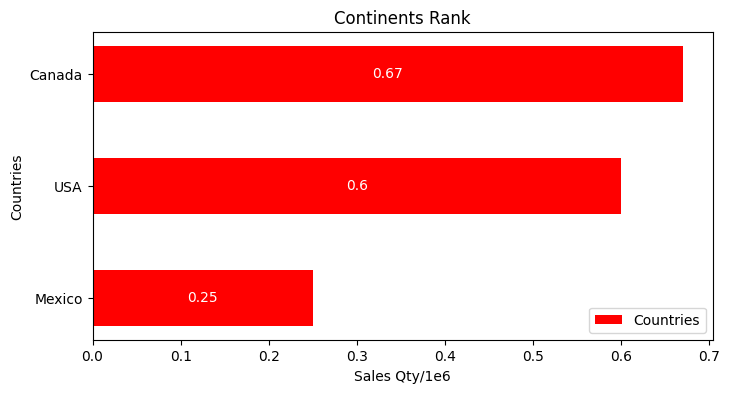

In [24]:
##Suppliers Origin Analysis


##First We'll See which continent has the most sales

print('Here we can see the continent with the most sales:')

sales_per_continent = sqldf('''


SELECT sup_db.'Continent', SUM(sales_db.'Sales Qty') as 'Sales Qty'
                            
                            from sales_df sales_db

                            left join supplier_df sup_db on (sup_db.'Contract' = sales_db.'Contract')


                            group by sup_db.'Continent'
                            
                            order by  SUM(sales_db.'Sales Qty') asc

''')

display(sales_per_continent) 

print('Now let''s calculate the sales per country inside this continent.\nSales in',sales_per_continent['Continent'][0],':')


##Now We'll make some graphics in order to get a better visualization of the data

x = np.arange(len(sales_per_continent))
width = 0.5


fig, ax = plt.subplots(figsize=(8,4))

# plot data in grouped manner of bar type - SALES $
ax.barh(x, round(sales_per_continent['Sales Qty']/1000000,2), width, color = 'Red')
plt.yticks(x, sales_per_continent['Continent'], rotation ='horizontal')
ax.bar_label(ax.containers[0], label_type='center', rotation = 'horizontal', color ='w')
plt.ylabel("Continents")
plt.xlabel("Sales Qty/1e6")
plt.title('Continents Rank')
ax.legend(["Continents"])

##Now we get the countries in the continent with the most sales

sales_in_first_continent = sqldf('''


SELECT sup_db.'Country', SUM(sales_db.'Sales Qty') as 'Sales Qty'
                            
                            from sales_df sales_db

                            left join supplier_df sup_db on (sup_db.'Contract' = sales_db.'Contract')

                            WHERE sup_db.'Continent' IN (
                            
                                                SELECT sales_p_db.'Continent'
                                                from sales_per_continent sales_p_db
                                                limit 1


                            
                            )
                            

                            group by sup_db.'Country'
                            
                            order by  SUM(sales_db.'Sales Qty') asc

''')


y= np.arange(len(sales_in_first_continent))
display(sales_in_first_continent)
print('\nBelow we can see the results shown above in a horizontal bar format\n')
fig2, ax2 = plt.subplots(figsize=(8,4))

# plot data in grouped manner of bar type - SALES $
ax2.barh(y, round(sales_in_first_continent['Sales Qty']/1000000,2), width, color = 'Red')
plt.yticks(y, sales_in_first_continent['Country'], rotation ='horizontal')
ax2.bar_label(ax2.containers[0], label_type='center', rotation = 'horizontal', color ='w')
plt.ylabel("Countries")
plt.xlabel("Sales Qty/1e6")
plt.title('Continents Rank')
ax2.legend(["Countries"])



ANOTHER NICE METRIC IS THE SUPPLIER LATE/ON-TIME DELIVERIES PERFORMANCE, SO WE CAN IDENTIFY THE WORST OFFENDERS AND PLAN INCREASING PERFORMANCE STRATEGIES WITH THEM.

The supplier with the most late deliveries is: Company 12


,Company,Late Sales Count,On-Time Sales Count
0,Company 12,1749,4257
1,Company 11,1048,2320
2,Company 16,1040,2328
3,Company 9,777,1743
4,Company 14,616,1463
5,Company 17,612,1128
6,Company 2,558,1278
7,Company 6,390,965
8,Company 20,390,880
9,Company 3,260,656


Now we can see a summary of the sales (Late and On-time) per supplier.


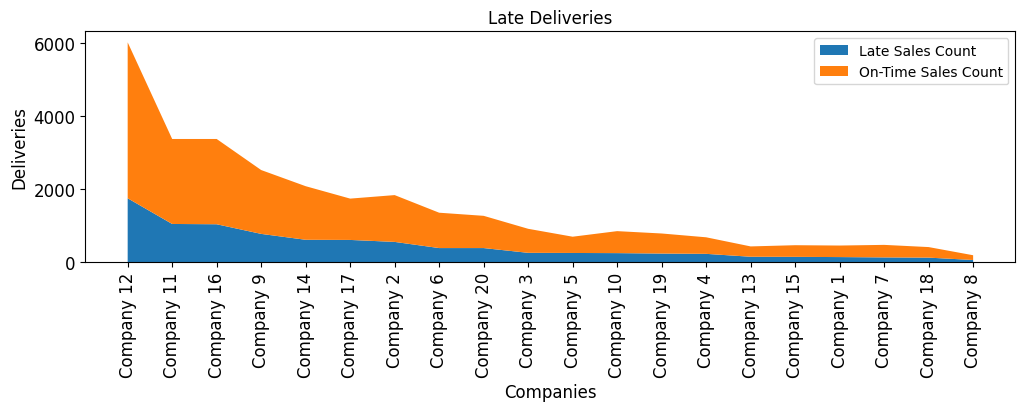

In [25]:
##Suppliers Performance

##Here We'll estimate the suppliers with the most late deliveries. We can make this analysis using the
##shipping date and the goods receipt time.

##Here i'll estimate that the date of the analysis is 01/03/2023.

##Now we'll Get the count of late and on-time deliveries per supplier in a df.



worst_offenders_suppliers = sqldf('''

WITH LATE_SUPPLIERS AS(

                SELECT sup_db.Company, COUNT(sales_sb.'Sales Qty') AS 'Late Sales Count'

                FROM sales_df sales_sb
                
                LEFT JOIN supplier_df sup_db on (sup_db.'Contract' = sales_sb.'Contract')
                
                WHERE 
                    JULIANDAY(DATE(sales_sb.'Ship Date'))-JULIANDAY(DATE('2023-03-01'))<0
                    

                GROUP BY sup_db.Company
                
                ORDER BY COUNT(sales_sb.'Sales Qty') DESC
                
                ) ,

                
                ON_TIME_SUPPLIERS AS (

                SELECT sup_db.Company, COUNT(sales_sb.'Sales Qty') AS 'On-Time Sales Count'

                FROM sales_df sales_sb
                
                LEFT JOIN supplier_df sup_db on (sup_db.'Contract' = sales_sb.'Contract')
                
                WHERE 
                    JULIANDAY(DATE(sales_sb.'Ship Date'))-JULIANDAY(DATE('2023-03-01'))>=0
                    

                GROUP BY sup_db.Company
                
                ORDER BY COUNT(sales_sb.'Sales Qty') DESC






                )
                                    
                        SELECT late_sup.Company, late_sup.'Late Sales Count', ont_sup.'On-Time Sales Count'
                        
                        FROM LATE_SUPPLIERS late_sup
                            
                            
                        left join ON_TIME_SUPPLIERS ont_sup on(
                                
                        late_sup.Company = ont_sup.Company


                            )

                        ORDER BY late_sup.'Late Sales Count' DESC


''')
print('The supplier with the most late deliveries is:',worst_offenders_suppliers['Company'][0])
display(worst_offenders_suppliers)

print('Now we can see a summary of the sales (Late and On-time) per supplier.')


##Now I'll make a stacked Area Graphic in order to visualize the proportion between late and on time deliveries per supplier.
fig, ax = plt.subplots(figsize=(12,3))
plt.stackplot(worst_offenders_suppliers['Company'],worst_offenders_suppliers['Late Sales Count'],worst_offenders_suppliers['On-Time Sales Count'] )
plt.title('Late Deliveries')
plt.tick_params(labelsize=12)
plt.xticks(worst_offenders_suppliers['Company'], rotation ='vertical')
plt.xlabel('Companies', size=12)
plt.ylabel('Deliveries', size=12)
plt.ylim(bottom=0)
plt.legend(worst_offenders_suppliers.loc[:, worst_offenders_suppliers.columns != 'Company'],loc='upper right')

plt.show()

FOR LAST, I'D LIKE TO GET THE MAIN PRODUCTS PER COUNTRY, SO WE CAN HAVE A PROFILE OF THE MOST COMMON ITEMS PER REGION.

In [26]:
##Main Products per Country

##HERE WE'LL GET A VIZ IN ORDER TO MAP THE MAIN SUPPLIER FOR EACH COUNTRY IN OUR SUPPLIER BASE


supplier_per_prod = sqldf('''

WITH RANKED AS(
SELECT sup_db.'Country',
                                sales_db.'Product',COUNT(sup_db.'Country') AS Count_per_Country,
                                RANK() OVER (PARTITION BY sup_db.'Country'
                                ORDER BY COUNT(sup_db.'Country') DESC
                        ) AS RANK

                                from sales_df sales_db

                                left join supplier_df sup_db  on (sales_db.'Contract' = sup_db.'Contract')

                        
                                

        Group by sup_db.'Country',sales_db.'Product'
        
        order by sup_db.'Country',COUNT(sup_db.'Country') desc)


,RANKED_COUNTRY AS(
SELECT sup_db.'Country',
                                COUNT(sup_db.'Country') AS Count_per_Country,
                                RANK() OVER (ORDER BY COUNT(sup_db.'Country') DESC
                        ) AS RANK_COUNTRY

                                from sales_df sales_db

                                left join supplier_df sup_db  on (sales_db.'Contract' = sup_db.'Contract')

                        
                                

        Group by sup_db.'Country'
        
        order by sup_db.'Country',COUNT(sup_db.'Country') desc)



                                
        SELECT RANKED.Country,
                        RANKED.Product,	
                        RANKED.Count_per_Country,
                        RANKED.RANK,
                        RANKED_COUNTRY.RANK_COUNTRY
                        
                                FROM RANKED
                LEFT JOIN RANKED_COUNTRY ON (RANKED.Country = RANKED_COUNTRY.Country)
                        
                        WHERE RANK < 4 and RANK_COUNTRY <6
                        
                        ORDER BY 
                        
                        RANKED_COUNTRY.RANK_COUNTRY,	
                        RANKED.Count_per_Country DESC


''')

print('The country with most sales is', supplier_per_prod['Country'][0])
print('Below we can see a list of the top 5 Coutnries with most deliveries, with their individual top 3 products:')


display(supplier_per_prod)
print('Now lets make a sunburst representation so we can better visualize de data:')
fig = px.sunburst(supplier_per_prod, path=['Country', 'Product'], values='Count_per_Country')
fig.show()

The country with most sales is Paraguay
Below we can see a list of the top 5 Coutnries with most deliveries, with their individual top 3 products:


,Country,Product,Count_per_Country,RANK,RANK_COUNTRY
0,Paraguay,Product 12,1638,1,1
1,Paraguay,Product 9,360,2,1
2,Paraguay,Product 2,306,3,1
3,Russia,Product 12,546,1,2
4,Russia,Product 3,458,2,2
5,Russia,Product 9,360,3,2
6,Portugal,Product 14,891,1,3
7,Portugal,Product 12,546,2,3
8,Portugal,Product 16,421,3,3
9,Spain,Product 11,842,1,4


Now lets make a sunburst representation so we can better visualize de data:
